In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import altair as alt
from sklearn.datasets import load_iris, load_wine, load_iris

In [4]:
iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['target'] = iris['target']
mapper_iris_target = {0:'setosa', 1:'vesicolor', 2:'virginica'}
df_iris['target_name'] = df_iris['target'].map(mapper_iris_target)

In [5]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df_iris_uni = df_iris['sepal length (cm)']

In [7]:
df_iris_uni

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2a8dcd5d6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a8dcd5dbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a8dcd5d400>],
 'medians': [<matplotlib.lines.Line2D at 0x2a8dcd75160>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a8dcd75400>],
 'means': []}

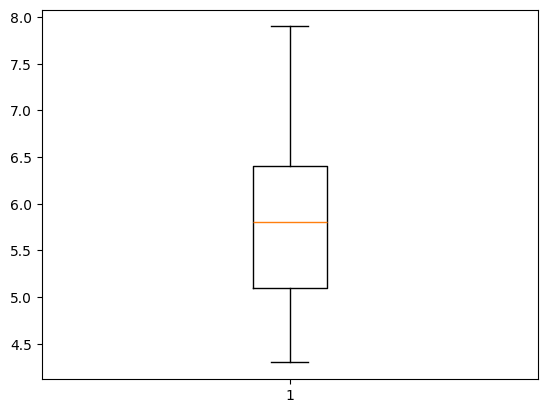

In [8]:
plt.boxplot(df_iris_uni)

<Axes: ylabel='sepal length (cm)'>

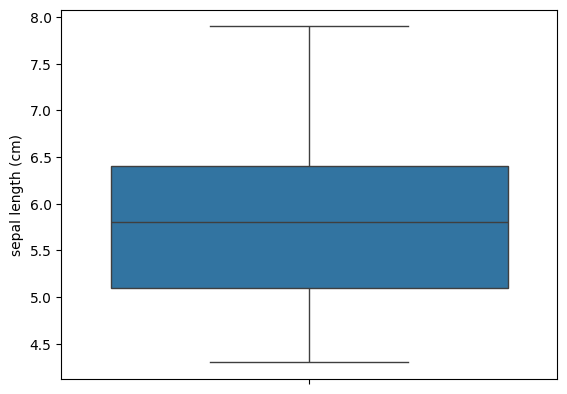

In [9]:
sns.boxplot(df_iris_uni)

In [10]:
boxplot = alt.Chart(df_iris_uni.to_frame()).mark_boxplot().encode(alt.Y("sepal length (cm):Q"))
boxplot

alt.Chart(...)

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

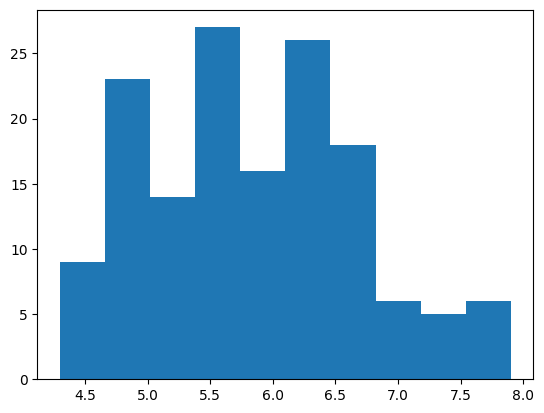

In [11]:
plt.hist(df_iris_uni)

Text(0, 0.5, 'count')

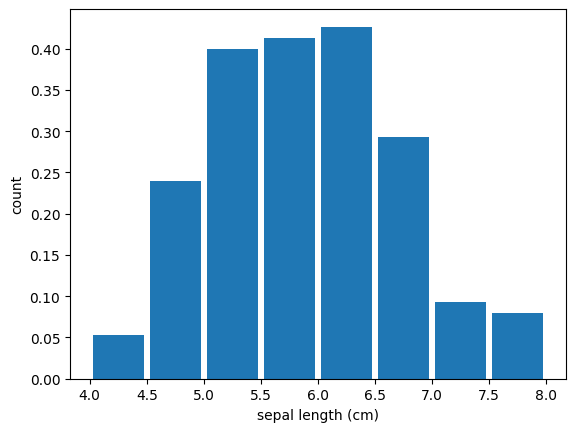

In [12]:
plt.hist(df_iris_uni, bins=[4,4.5,5,5.5,6,6.5,7,7.5,8], density=True, rwidth=0.9)
plt.xlabel('sepal length (cm)')
plt.ylabel('count')

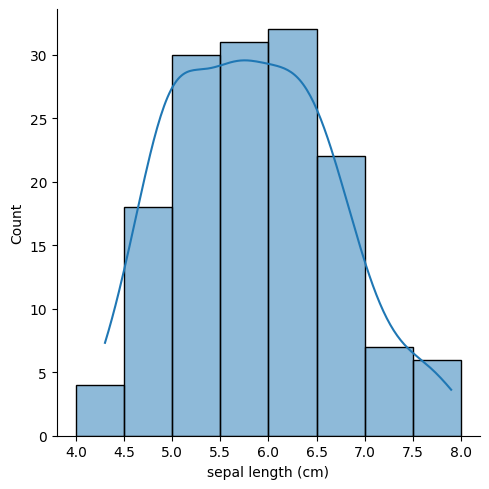

In [13]:
sns.displot(df_iris_uni, bins=[4,4.5,5,5.5,6,6.5,7,7.5,8], kde=True)

In [14]:
barchart = alt.Chart(pd.DataFrame(df_iris_uni)).mark_bar().encode(
    alt.X("sepal length (cm):Q", bin=alt.Bin(maxbins=10)),
    alt.Y("count():Q", stack=None)
)
barchart

alt.Chart(...)

In [15]:
barchart.interactive()

alt.Chart(...)

In [18]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df_titanic_nom_nom = df_titanic.loc[:, ['class', 'embark_town']]
df_titanic_nom_nom_pivot = (df_titanic_nom_nom
                            .value_counts()
                            .to_frame('count')
                            .pivot_table(index='class', columns='embark_town', values='count'))
df_titanic_nom_nom_pivot

C:\Users\User\AppData\Local\Temp\ipykernel_12220\868654716.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_titanic_nom_nom_pivot = (df_titanic_nom_nom


embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85.0,2.0,127.0
Second,17.0,3.0,164.0
Third,66.0,72.0,353.0


In [21]:
df_titanic_nom_nom_pivot_pct = df_titanic_nom_nom_pivot.divide(df_titanic_nom_nom_pivot.sum(axis='rows'), axis='columns')
df_titanic_nom_nom_pivot_pct

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,0.505952,0.025974,0.197205
Second,0.101190,0.038961,0.254658
Third,0.392857,0.935065,0.548137


Text(0.5, 1.0, 'Percent count of customer for each embark_town')

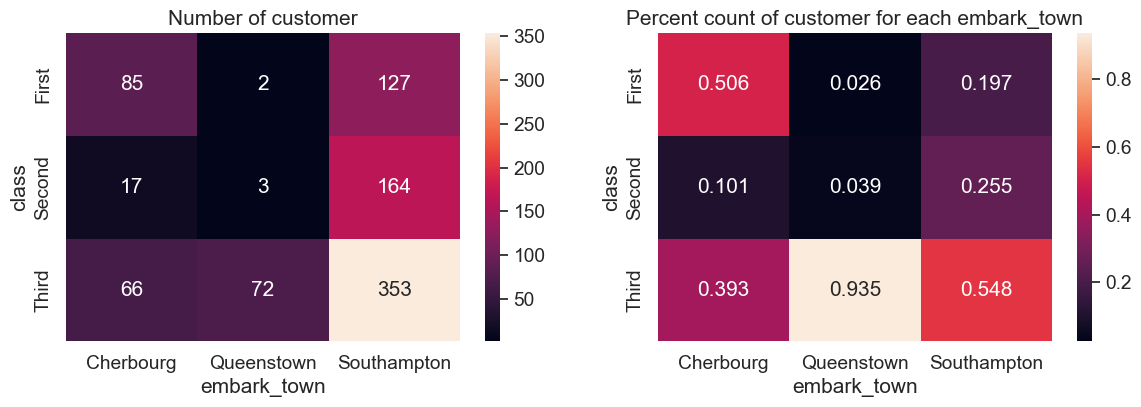

In [22]:
sns.set(font_scale=1.25)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

sns.heatmap(df_titanic_nom_nom_pivot, annot=True, fmt=".0f", ax=ax1)
sns.heatmap(df_titanic_nom_nom_pivot_pct, annot=True, fmt=".03f", ax=ax2)

ax1.set_title("Number of customer", fontsize=15)
ax2.set_title("Percent count of customer for each embark_town", fontsize=15)

In [23]:
df_titanic_nom_nom_pivot.unstack().to_frame('count').reset_index()

,embark_town,class,count
0,Cherbourg,First,85.0
1,Cherbourg,Second,17.0
2,Cherbourg,Third,66.0
3,Queenstown,First,2.0
4,Queenstown,Second,3.0
5,Queenstown,Third,72.0
6,Southampton,First,127.0
7,Southampton,Second,164.0
8,Southampton,Third,353.0


In [24]:
df_titanic_nom_nom_unstack = df_titanic_nom_nom_pivot.unstack().to_frame('count').reset_index()

heatmap = alt.Chart(df_titanic_nom_nom_unstack).mark_rect().encode(
    x='embark_town:N',
    y='class:N',
    color='count:Q'
)

number = alt.Chart(df_titanic_nom_nom_unstack).mark_text(fontSize=20).encode(
    x='embark_town:N',
    y='class:N',
    text='count:Q',
    color=alt.condition(
        alt.datum.count > 300,
        alt.value('white'),
        alt.value('black')
    )
)
(heatmap+number).properties(
    width=200,
    height=150
)

alt.LayerChart(...)

In [25]:
df_titanic_nom_quan = df_titanic.loc[:, ['class', 'fare']]
df_titanic_nom_quan

,class,fare
0,Third,7.2500
1,First,71.2833
2,Third,7.9250
3,First,53.1000
4,Third,8.0500
...,...,...
886,Second,13.0000
887,First,30.0000
888,Third,23.4500
889,First,30.0000


In [27]:
df_titanic_nom_quan_bar = df_titanic_nom_quan.groupby('class')[['fare']].mean().reset_index()
df_titanic_nom_quan_bar = df_titanic_nom_quan_bar.rename(columns={'fare': 'mean_fare'})
df_titanic_nom_quan_bar

C:\Users\User\AppData\Local\Temp\ipykernel_12220\3214202788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic_nom_quan_bar = df_titanic_nom_quan.groupby('class')[['fare']].mean().reset_index()


,class,mean_fare
0,First,84.154687
1,Second,20.662183
2,Third,13.675550


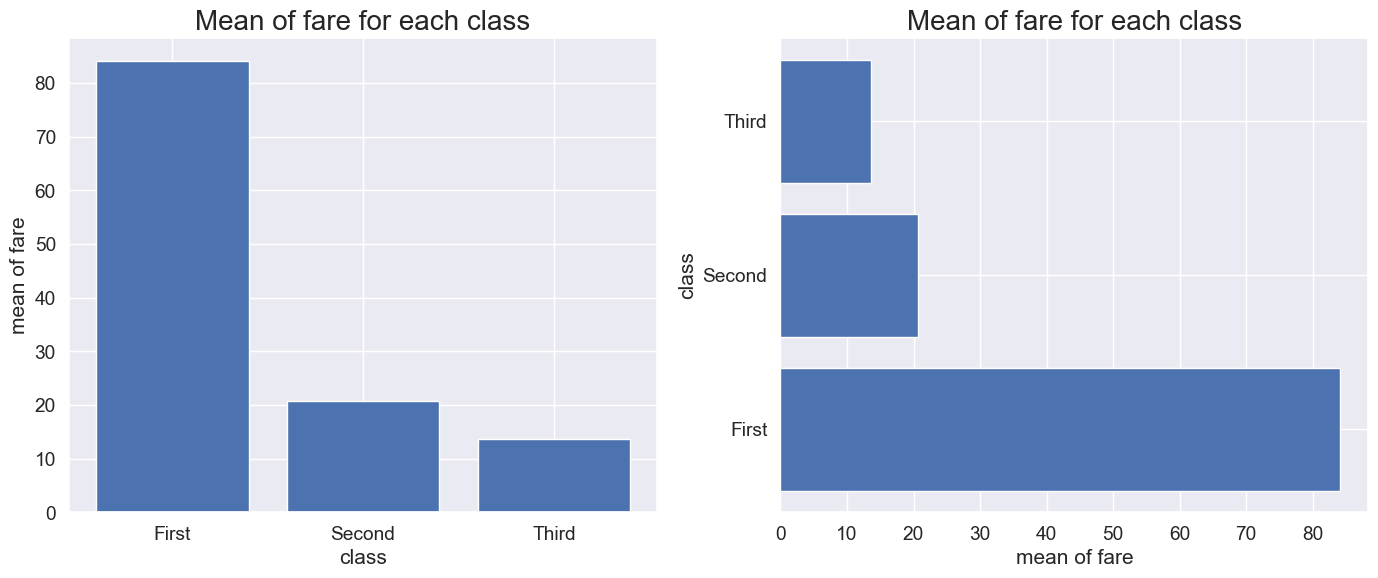

In [28]:
sns.set(font_scale=1.25)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(x='class', height='mean_fare', data=df_titanic_nom_quan_bar)
ax1.set_xlabel('class')
ax1.set_ylabel('mean of fare')
ax1.set_title('Mean of fare for each class', fontsize=20)

ax2.barh(y='class', width='mean_fare', data=df_titanic_nom_quan_bar)
ax2.set_xlabel('mean of fare')
ax2.set_ylabel('class')
ax2.set_title('Mean of fare for each class', fontsize=20)

fig.tight_layout(pad=1.0)

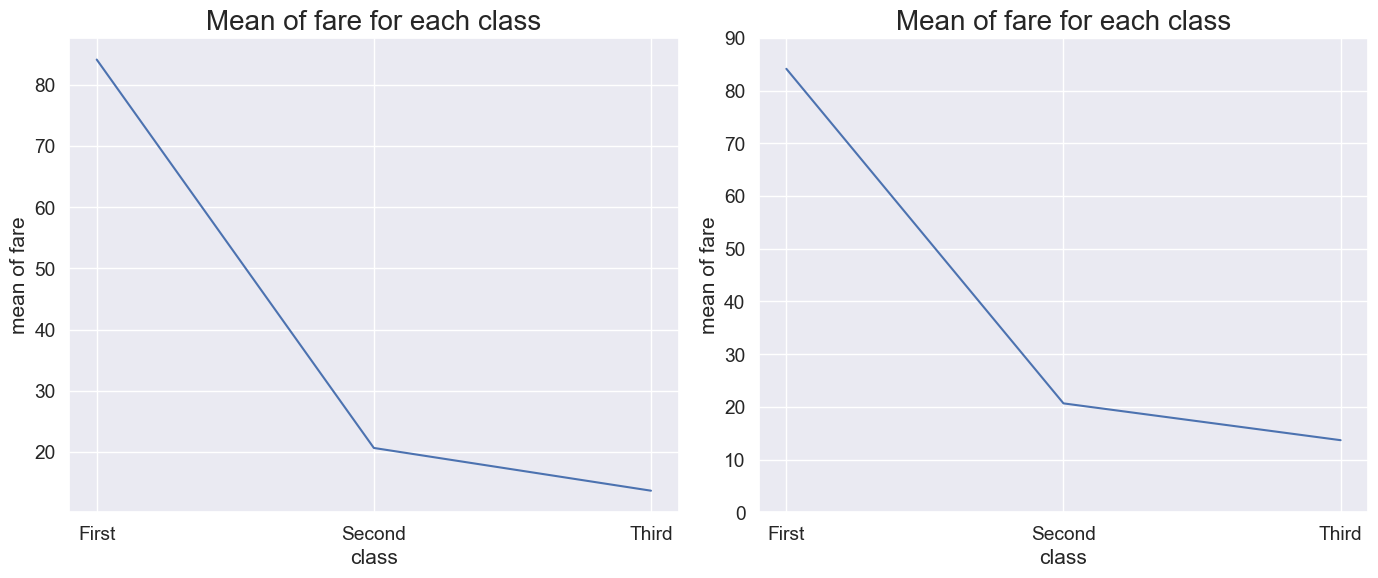

In [29]:
sns.set(font_scale=1.25)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(['First', 'Second', 'Third'], df_titanic_nom_quan_bar['mean_fare'])
ax1.set_xlabel('class')
ax1.set_ylabel('mean of fare')
ax1.set_title('Mean of fare for each class', fontsize=20)

ax2.plot(['First', 'Second', 'Third'], df_titanic_nom_quan_bar['mean_fare'])
ax2.set_ylim(0, 90)
ax2.set_xlabel('class')
ax2.set_ylabel('mean of fare')
ax2.set_title('Mean of fare for each class', fontsize=20)

fig.tight_layout(pad=1.0)

<Axes: xlabel='fare', ylabel='Density'>

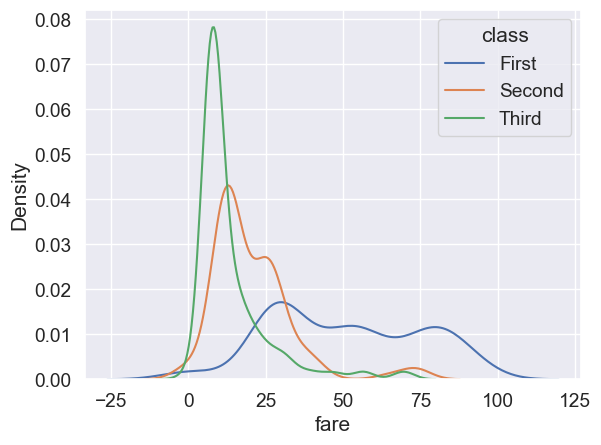

In [30]:
sns.kdeplot(x='fare', hue='class', data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='First'].query('fare<100'))
sns.kdeplot(x='fare', hue='class', data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='Second'].query('fare<100'))
sns.kdeplot(x='fare', hue='class', data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='Third'].query('fare<100'))

<Axes: xlabel='class', ylabel='fare'>

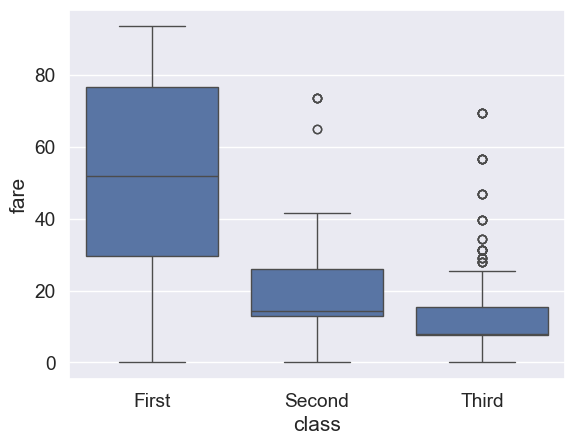

In [31]:
sns.boxplot(x='class', y='fare', data=df_titanic_nom_quan.query('fare<100'))

In [32]:
print('titanic dataframe')
display(df_titanic.head())
print('')
print('')
print('iris dataframe')
display(df_iris.head())

titanic dataframe


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




iris dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


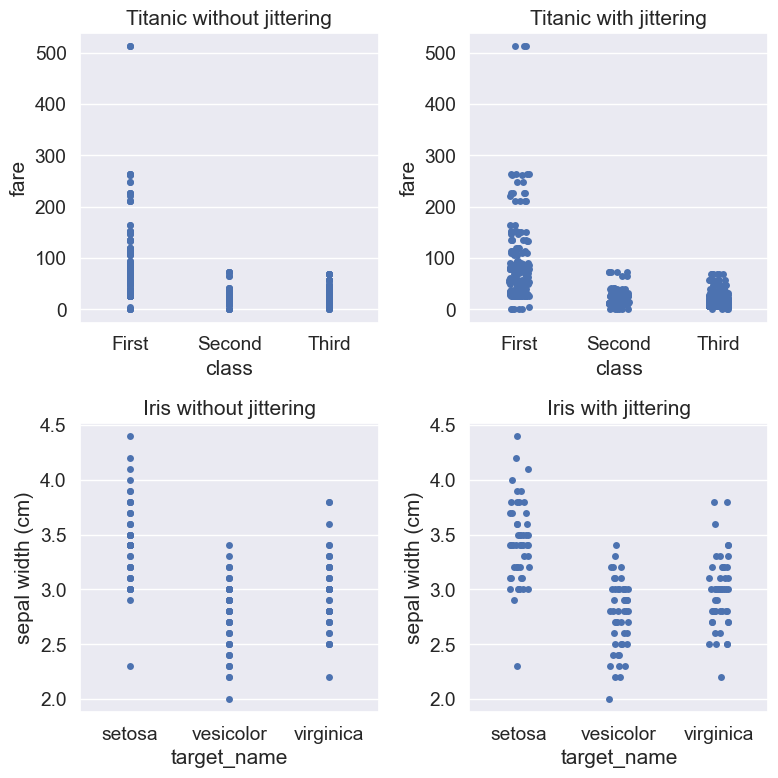

In [33]:
sns.set(font_scale=1.25)
fig,([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(8,8))

sns.stripplot(x='class', y='fare', data=df_titanic_nom_quan, jitter=False, ax=ax1)
sns.stripplot(x='class', y='fare', data=df_titanic_nom_quan, jitter=True, ax=ax2)

sns.stripplot(x='target_name', y='sepal width (cm)', data=df_iris, jitter=False, ax=ax3)
sns.stripplot(x='target_name', y='sepal width (cm)', data=df_iris, jitter=True, ax=ax4)

ax1.set_title("Titanic without jittering", fontsize=15)
ax2.set_title("Titanic with jittering", fontsize=15)

ax3.set_title("Iris without jittering", fontsize=15)
ax4.set_title("Iris with jittering", fontsize=15)

fig.tight_layout(pad=1.0)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 74.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

Text(0.5, 1.0, 'Iris dataset')

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


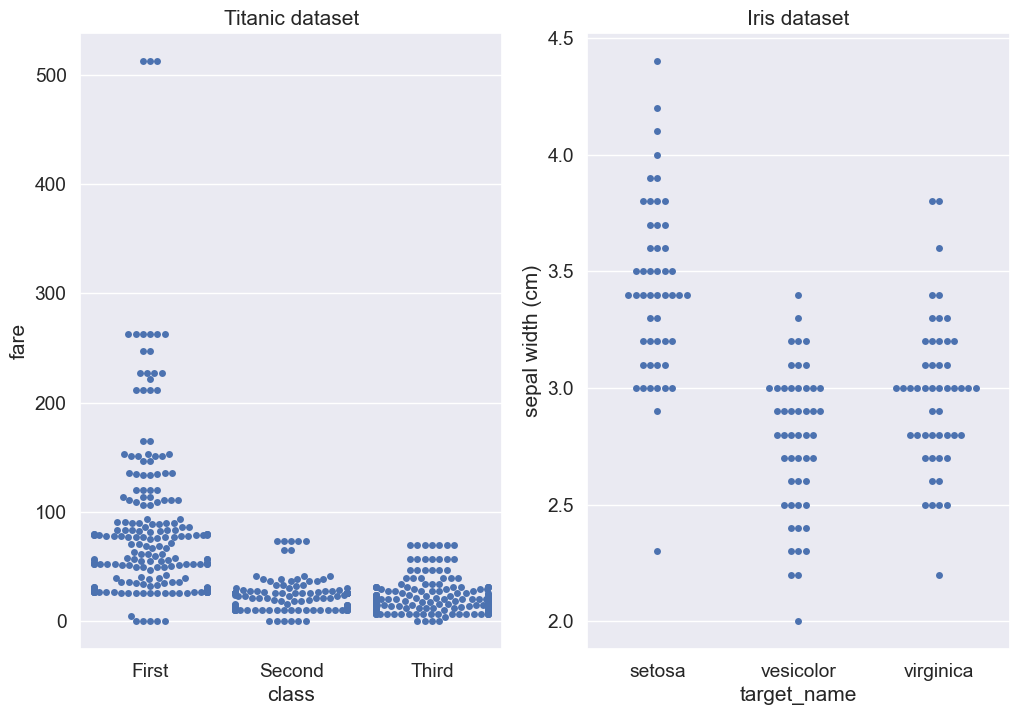

In [34]:
sns.set(font_scale=1.25)
fig,([ax1, ax2]) = plt.subplots(1, 2, figsize=(12,8))
sns.swarmplot(x='class', y='fare', data=df_titanic_nom_quan, ax=ax1)
sns.swarmplot(x='target_name', y='sepal width (cm)', data=df_iris, ax=ax2)

ax1.set_title("Titanic dataset", fontsize=15)
ax2.set_title("Iris dataset", fontsize=15)

In [35]:
df_iris.loc[:, ['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'sepal width')

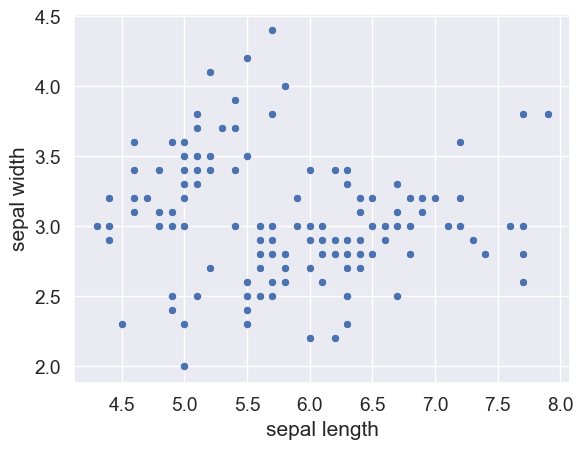

In [36]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [37]:
scatter = alt.Chart(df_iris).mark_point().encode(
    x='sepal length (cm)',
    y='sepal width (cm)'
)
scatter.properties(
    width=400,
    height=400
).interactive()

alt.Chart(...)

Text(0, 0.5, 'sepal width')

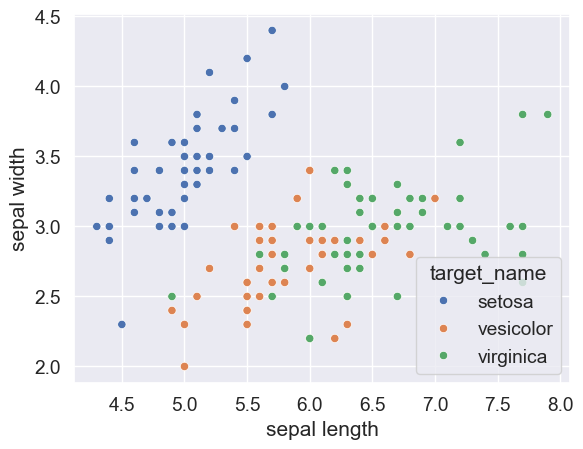

In [38]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target_name', data=df_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [39]:
scatter = alt.Chart(df_iris).mark_point().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
    color='target_name'
)
scatter.properties(
    width=400,
    height=400
).interactive()

alt.Chart(...)